## Neural Network

In [217]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping




In [218]:
data=pd.read_csv("C:/Users/erick/Desktop/ITESO/Semestre 9/Microestructuras y sistemas de trading/data/aapl_1d_train.csv")
data.dropna(inplace=True)

In [219]:
data=data["Close"].values.reshape(-1, 1)

In [220]:
def create_dataset(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps - 1):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)





In [221]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [222]:
# Set the number of time steps for LSTM
time_steps = 6  # Number of previous days to use for prediction

# Create input features and labels
X, y = create_dataset(scaled_data, time_steps)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input features for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [223]:

# Build the LSTM model
model = Sequential([
    LSTM(units=560,return_sequences=True,input_shape=(X_train.shape[1], 1)),
    LSTM(units=260),
    Dense(units=1,activation="relu")
])



c:\Users\erick\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [224]:
# Compile the model
model.compile(optimizer='adam', loss="mse",metrics=['root_mean_squared_error'])



In [225]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

In [226]:

# Train the model
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2, batch_size=32, callbacks=[early_stopping])

Epoch 1/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 13s 75ms/step - loss: 0.0127 - root_mean_squared_error: 0.1000 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0466
Epoch 2/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - loss: 1.6245e-04 - root_mean_squared_error: 0.0127 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0462
Epoch 3/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - loss: 1.2939e-04 - root_mean_squared_error: 0.0114 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0456
Epoch 4/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - loss: 1.8524e-04 - root_mean_squared_error: 0.0136 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0458
Epoch 5/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - loss: 1.5488e-04 - root_mean_squared_error: 0.0124 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0450
Epoch 6/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - loss: 1.7148e-04 - root_mean_squared_error: 0.0131 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0475
Epoch 7/30
106/106 ━━━━━

In [227]:
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)


132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [228]:
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform([y_train])
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform([y_test])

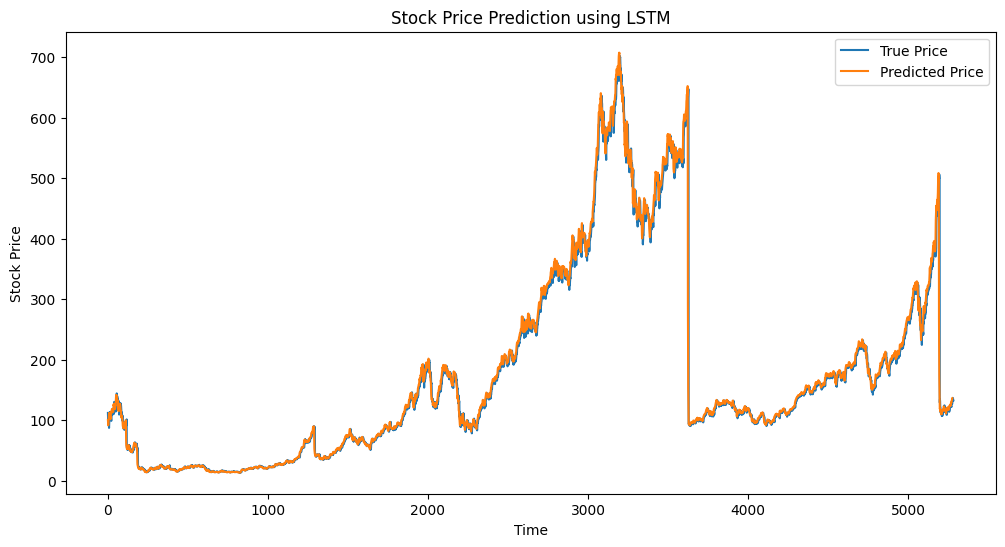

In [229]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(data, label='True Price')
plt.plot(np.concatenate([train_predictions, test_predictions]), label='Predicted Price')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [230]:
data_test=pd.read_csv("C:/Users/erick/Desktop/ITESO/Semestre 9/Microestructuras y sistemas de trading/data/aapl_1d_test.csv")
data_test.dropna(inplace=True)

In [231]:
data_test=data_test["Close"].values.reshape(-1, 1)

In [232]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_test)

In [233]:
# Set the number of time steps for LSTM
time_steps = 30  # Number of previous days to use for prediction

# Create input features and labels
X_test, y_test = create_dataset(scaled_data, time_steps)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [234]:
test_predictions = model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step


In [235]:
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform([y_test])

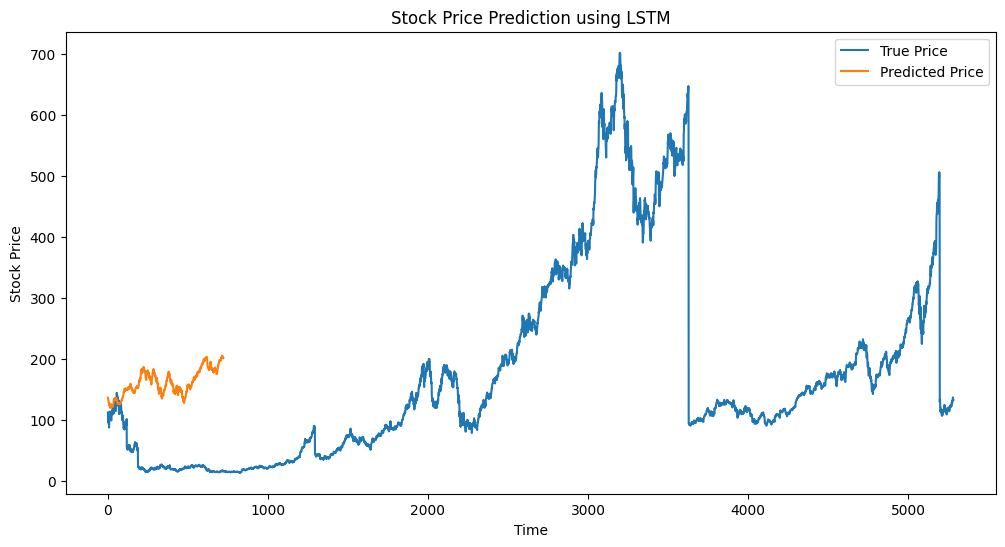

In [236]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(data, label='True Price')
plt.plot(test_predictions, label='Predicted Price')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()